In [9]:
import pandas as pd
import numpy as np

### getting electricity price data in the EU

In [ ]:
energy_prices = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\estat_energy_pc.csv")
energy_prices

,freq,product,nrg_cons,unit,tax,currency,geo,2007-S1,2007-S2,2008-S1,...,2020-S1,2020-S2,2021-S1,2021-S2,2022-S1,2022-S2,2023-S1,2023-S2,2024-S1,2024-S2
0,S,6000,KWH1000-2499,KWH,I_TAX,EUR,AL,NaN,NaN,NaN,...,0.0922,0.0920,0.0925,0.0937,0.0941,0.0976,0.1010,0.1089,0.1114,NaN
1,S,6000,KWH1000-2499,KWH,I_TAX,EUR,AT,NaN,0.2008,0.2005,...,0.2511,0.2567,0.2650,0.2787,0.2616,0.2614,0.2988,0.3055,0.3011,0.2631
2,S,6000,KWH1000-2499,KWH,I_TAX,EUR,BA,NaN,NaN,NaN,...,0.0975,0.1007,0.0980,0.0970,0.0996,0.1003,0.1043,0.0990,0.1067,NaN
3,S,6000,KWH1000-2499,KWH,I_TAX,EUR,BE,NaN,0.1867,0.2172,...,0.2998,0.2938,0.2910,0.3161,0.3633,0.4586,0.4559,0.4111,0.3715,0.3695
4,S,6000,KWH1000-2499,KWH,I_TAX,EUR,BG,NaN,0.0721,0.0731,...,0.1017,0.1021,0.1045,0.1104,0.1110,0.1147,0.1146,0.1192,0.1193,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,S,6000,TOT_KWH,KWH,X_VAT,PPS,RS,NaN,NaN,NaN,...,NaN,NaN,NaN,0.1309,0.1307,0.1420,0.1497,0.1612,0.1589,NaN
2192,S,6000,TOT_KWH,KWH,X_VAT,PPS,SE,NaN,NaN,NaN,...,0.0983,0.1029,0.1046,0.1248,0.1068,0.1330,0.1462,0.1290,0.1369,NaN
2193,S,6000,TOT_KWH,KWH,X_VAT,PPS,SI,NaN,NaN,NaN,...,NaN,NaN,NaN,0.1583,0.1299,0.1915,0.1964,0.1991,0.1965,NaN
2194,S,6000,TOT_KWH,KWH,X_VAT,PPS,SK,NaN,NaN,NaN,...,NaN,NaN,NaN,0.1678,0.1847,0.1959,0.1919,0.2067,0.1860,NaN


In [11]:
#select the data that actually is interesting for us
energy_prices["tax"].unique()

array(['I_TAX', 'X_TAX', 'X_VAT'], dtype=object)

In [12]:
# energy_prices.drop(energy_prices["currency"] != 'EUR')

In [ ]:
consumption_data = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\electricity_consumption_monthly.csv")
consumption_data = consumption_data.transpose()

headers = consumption_data.iloc[0]
consumption  = pd.DataFrame(consumption_data.values[1:], columns=headers).reset_index()

consumption["month"] = [1,2,3,4,5,6,7,8,9,10,11,12,"annual"]
consumption["month_long"] = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Out","Nov","Dec","Annual"]
# consumption.drop(consumption["Country"])
consumption

Country,index,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,...,Albania,Bosnia & Herzegovina,Montenegro,North Macedonia,Serbia,Turkey,Ukraine,Moldova,month,month_long
0,0,480,480,320,380,300,410,520,430,1300,...,300,340,330,320,350,360,400,310,1,Jan
1,1,450,450,300,350,280,380,490,400,1200,...,280,320,310,300,330,340,370,290,2,Feb
2,2,410,420,270,320,260,350,450,370,1000,...,260,290,280,270,300,310,340,260,3,Mar
3,3,370,380,230,280,240,310,400,330,850,...,230,250,250,240,260,280,300,230,4,Apr
4,4,330,340,210,250,260,280,350,290,700,...,210,230,230,220,240,300,270,210,5,May
5,5,300,310,200,240,350,260,320,260,600,...,220,220,230,210,230,370,250,200,6,Jun
6,6,290,300,220,260,420,250,310,240,550,...,250,230,250,230,240,450,240,210,7,Jul
7,7,290,310,240,280,440,250,320,250,600,...,270,240,270,250,250,470,250,220,8,Aug
8,8,320,340,210,250,380,270,360,280,750,...,230,230,240,220,240,400,270,210,9,Sep
9,9,380,390,220,270,300,320,420,340,900,...,220,240,230,230,250,320,320,230,10,Out


### bitcoin data - price and difficulty per date

In [14]:
btc = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\btc_price_diff_hash.tsv", sep="\t")
btc

,"""Time""",BTC / USD Denominated Closing Price,BTC / Mean Hash Rate,BTC / Difficulty
0,2010-07-18,0.085840,4.456770e-04,3.883537e+01
1,2010-07-19,0.083320,4.936993e-04,4.430743e+01
2,2010-07-20,0.080459,5.428193e-04,4.977949e+01
3,2010-07-21,0.080142,6.006534e-04,5.525155e+01
4,2010-07-22,0.075808,6.491045e-04,6.072361e+01
...,...,...,...,...
5376,2025-04-06,83717.533255,8.399130e+08,1.134175e+14
5377,2025-04-07,83492.550771,8.440071e+08,1.137821e+14
5378,2025-04-08,83349.338542,8.455318e+08,1.140941e+14
5379,2025-04-09,83473.159987,8.432891e+08,1.144060e+14


In [15]:
btc.rename(columns={'"Time"':"date", "BTC / USD Denominated Closing Price":"price_usd", "BTC / Mean Difficulty":"mean_difficulty_h/s", "BTC / Difficulty":"difficulty_h/s", "BTC / Mean Hash Rate":"network_hashrate"}, inplace=True)

In [16]:
btc[['year', 'month', 'day']] = btc["date"].str.split('-', expand=True)

In [17]:
btc["date"] = pd.to_datetime(btc["date"])
btc['year'] = btc['year'].astype(int)
btc['month'] = btc['month'].astype(int)
btc['day'] = btc['day'].astype(int)

In [18]:
btc.dtypes

date                datetime64[ns]
price_usd                  float64
network_hashrate           float64
difficulty_h/s             float64
year                         int64
month                        int64
day                          int64
dtype: object

In [19]:
btc

,date,price_usd,network_hashrate,difficulty_h/s,year,month,day
0,2010-07-18,0.085840,4.456770e-04,3.883537e+01,2010,7,18
1,2010-07-19,0.083320,4.936993e-04,4.430743e+01,2010,7,19
2,2010-07-20,0.080459,5.428193e-04,4.977949e+01,2010,7,20
3,2010-07-21,0.080142,6.006534e-04,5.525155e+01,2010,7,21
4,2010-07-22,0.075808,6.491045e-04,6.072361e+01,2010,7,22
...,...,...,...,...,...,...,...
5376,2025-04-06,83717.533255,8.399130e+08,1.134175e+14,2025,4,6
5377,2025-04-07,83492.550771,8.440071e+08,1.137821e+14,2025,4,7
5378,2025-04-08,83349.338542,8.455318e+08,1.140941e+14,2025,4,8
5379,2025-04-09,83473.159987,8.432891e+08,1.144060e+14,2025,4,9


In [20]:
btc_avg = btc.groupby(["year", "month"]).mean().reset_index()

In [21]:
btc_avg

,year,month,date,price_usd,network_hashrate,difficulty_h/s,day
0,2010,7,2010-07-24 12:00:00,0.072323,8.056463e-04,7.646855e+01,24.5
1,2010,8,2010-08-16 00:00:00,0.064284,2.690322e-03,2.820082e+02,16.0
2,2010,9,2010-09-15 12:00:00,0.063394,5.516912e-03,6.228462e+02,15.5
3,2010,10,2010-10-16 00:00:00,0.075977,1.074479e-02,1.202808e+03,16.0
4,2010,11,2010-11-15 12:00:00,0.195861,3.105021e-02,3.189428e+03,15.5
...,...,...,...,...,...,...,...
173,2024,12,2024-12-16 00:00:00,95817.817822,7.561134e+08,1.036725e+14,16.0
174,2025,1,2025-01-16 00:00:00,97949.432052,7.857852e+08,1.089697e+14,16.0
175,2025,2,2025-02-14 12:00:00,99519.385622,7.973248e+08,1.103331e+14,14.5
176,2025,3,2025-03-16 00:00:00,89347.667977,8.044427e+08,1.118902e+14,16.0


In [22]:
btc2024 = btc_avg[btc_avg["year"] == 2024]
btc2024

,year,month,date,price_usd,network_hashrate,difficulty_h/s,day
162,2024,1,2024-01-16 00:00:00,43217.440130,5.169931e+08,7.117474e+13,16.0
163,2024,2,2024-02-15 00:00:00,44702.304053,5.514249e+08,7.410296e+13,15.0
164,2024,3,2024-03-16 00:00:00,60255.658795,5.849835e+08,8.058989e+13,16.0
165,2024,4,2024-04-15 12:00:00,67707.376394,6.129936e+08,8.397686e+13,15.5
166,2024,5,2024-05-16 00:00:00,64158.103635,6.094271e+08,8.610011e+13,16.0
167,2024,6,2024-06-15 12:00:00,67343.266864,5.959758e+08,8.396627e+13,15.5
168,2024,7,2024-07-16 00:00:00,62450.501471,5.873993e+08,8.228848e+13,16.0
169,2024,8,2024-08-16 00:00:00,62150.267446,6.283055e+08,8.591819e+13,16.0
170,2024,9,2024-09-15 12:00:00,59394.894134,6.439067e+08,8.945809e+13,15.5
171,2024,10,2024-10-16 00:00:00,63039.794742,6.610039e+08,9.081202e+13,16.0


### miner data

In [ ]:
miner = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\miners.csv")
miner["hashrate_h/s"] = miner["hashrate  Th/s"] * 10**12
miner

,miner,model,price_EUR,consumption_W,hashrate Th/s,Energy Efficiency j/Ths,hashrate_h/s
0,Bitaxe Gamma,Bitaxe Gamma 601 Series,139.87,17.0,1.0,15.0,1.000000e+12
1,NerdQaxe++ 4.8TH/s,NerdQaxe++ ASIC Miner\n 4.8TH/s Home Bitcoin m...,449.87,60.0,4.8,15.0,4.800000e+12
2,Avalon Q,Canaan Avalon Q home Bitcoin miner,1599.87,1670.0,90.0,18.6,9.000000e+13


### bitcoin mined per miner

In [24]:
# in the current year
btc2024_mined = btc[btc["year"] == 2024]

btc2024_mined_avg = btc2024_mined.groupby(['year', 'month']).mean().reset_index()
btc2024_mined_avg

,year,month,date,price_usd,network_hashrate,difficulty_h/s,day
0,2024,1,2024-01-16 00:00:00,43217.440130,5.169931e+08,7.117474e+13,16.0
1,2024,2,2024-02-15 00:00:00,44702.304053,5.514249e+08,7.410296e+13,15.0
2,2024,3,2024-03-16 00:00:00,60255.658795,5.849835e+08,8.058989e+13,16.0
3,2024,4,2024-04-15 12:00:00,67707.376394,6.129936e+08,8.397686e+13,15.5
4,2024,5,2024-05-16 00:00:00,64158.103635,6.094271e+08,8.610011e+13,16.0
5,2024,6,2024-06-15 12:00:00,67343.266864,5.959758e+08,8.396627e+13,15.5
6,2024,7,2024-07-16 00:00:00,62450.501471,5.873993e+08,8.228848e+13,16.0
7,2024,8,2024-08-16 00:00:00,62150.267446,6.283055e+08,8.591819e+13,16.0
8,2024,9,2024-09-15 12:00:00,59394.894134,6.439067e+08,8.945809e+13,15.5
9,2024,10,2024-10-16 00:00:00,63039.794742,6.610039e+08,9.081202e+13,16.0


In [25]:
print(btc2024_mined_avg.columns)

Index(['year', 'month', 'date', 'price_usd', 'network_hashrate',
       'difficulty_h/s', 'day'],
      dtype='object')


In [26]:
# values of bitcoin mined per month - considering a full month of production
# this needs to be multiplied by the actual power available

btc2024_mined_avg["income_Avalon_BTC"] = (3.125 * 86400 / (btc2024_mined_avg["difficulty_h/s"] * (2**32 / (miner["hashrate_h/s"].iloc[2])))) * 30
btc2024_mined_avg["income_Avalon_USD"] = btc2024_mined_avg["income_Avalon_BTC"] * btc2024_mined_avg["price_usd"]

btc2024_mined_avg

,year,month,date,price_usd,network_hashrate,difficulty_h/s,day,income_Avalon_BTC,income_Avalon_USD
0,2024,1,2024-01-16 00:00:00,43217.440130,5.169931e+08,7.117474e+13,16.0,0.002385,103.062531
1,2024,2,2024-02-15 00:00:00,44702.304053,5.514249e+08,7.410296e+13,15.0,0.002291,102.391049
2,2024,3,2024-03-16 00:00:00,60255.658795,5.849835e+08,8.058989e+13,16.0,0.002106,126.906811
3,2024,4,2024-04-15 12:00:00,67707.376394,6.129936e+08,8.397686e+13,15.5,0.002021,136.849757
4,2024,5,2024-05-16 00:00:00,64158.103635,6.094271e+08,8.610011e+13,16.0,0.001971,126.478137
5,2024,6,2024-06-15 12:00:00,67343.266864,5.959758e+08,8.396627e+13,15.5,0.002021,136.130987
6,2024,7,2024-07-16 00:00:00,62450.501471,5.873993e+08,8.228848e+13,16.0,0.002063,128.814437
7,2024,8,2024-08-16 00:00:00,62150.267446,6.283055e+08,8.591819e+13,16.0,0.001976,122.779417
8,2024,9,2024-09-15 12:00:00,59394.894134,6.439067e+08,8.945809e+13,15.5,0.001897,112.693059
9,2024,10,2024-10-16 00:00:00,63039.794742,6.610039e+08,9.081202e+13,16.0,0.001869,117.825449


### solar production data in lisbon 

In [ ]:
#estimated solar production in lisbon per month
solar_lisbon = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\pvwatts_monthly_lisbon_clean.csv")
solar_lisbon

,month,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh)
0,1,3.038,320.077,303.968
1,2,3.828,361.120,343.923
2,3,5.087,526.061,501.616
3,4,6.038,593.451,566.425
4,5,6.791,684.574,653.497
5,6,7.425,716.440,684.395
6,7,8.085,792.642,757.675
7,8,7.702,761.024,727.437
8,9,6.377,611.853,584.530
9,10,4.622,472.337,450.236


In [28]:
solar_lisbon["location"] = "Lisbon"
solar_lisbon["latitude"] = 38.73
solar_lisbon["longitude"] = -9.14
solar_lisbon["month_long"] = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Out","Nov","Dec"]

In [29]:
solar_lisbon

,month,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,latitude,longitude,month_long
0,1,3.038,320.077,303.968,Lisbon,38.73,-9.14,Jan
1,2,3.828,361.120,343.923,Lisbon,38.73,-9.14,Feb
2,3,5.087,526.061,501.616,Lisbon,38.73,-9.14,Mar
3,4,6.038,593.451,566.425,Lisbon,38.73,-9.14,Apr
4,5,6.791,684.574,653.497,Lisbon,38.73,-9.14,May
5,6,7.425,716.440,684.395,Lisbon,38.73,-9.14,Jun
6,7,8.085,792.642,757.675,Lisbon,38.73,-9.14,Jul
7,8,7.702,761.024,727.437,Lisbon,38.73,-9.14,Aug
8,9,6.377,611.853,584.530,Lisbon,38.73,-9.14,Sep
9,10,4.622,472.337,450.236,Lisbon,38.73,-9.14,Out


In [30]:
solar_lisbon["AC System Output (kWh)"].sum()

np.float64(6127.665)

### getting data for solar energy production in some european capitals 

In [ ]:
production = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\europe_locations.csv")
production.head(12)

,month,month_long,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,country,latitude,longitude
0,1,Jan,3.038,320.077,303.968,Lisbon,Portugal,38.73,-9.14
1,2,Feb,3.828,361.120,343.923,Lisbon,Portugal,38.73,-9.14
2,3,Mar,5.087,526.061,501.616,Lisbon,Portugal,38.73,-9.14
3,4,Apr,6.038,593.451,566.425,Lisbon,Portugal,38.73,-9.14
4,5,May,6.791,684.574,653.497,Lisbon,Portugal,38.73,-9.14
5,6,Jun,7.425,716.440,684.395,Lisbon,Portugal,38.73,-9.14
6,7,Jul,8.085,792.642,757.675,Lisbon,Portugal,38.73,-9.14
7,8,Aug,7.702,761.024,727.437,Lisbon,Portugal,38.73,-9.14
8,9,Sep,6.377,611.853,584.530,Lisbon,Portugal,38.73,-9.14
9,10,Oct,4.622,472.337,450.236,Lisbon,Portugal,38.73,-9.14


In [32]:
compare_lisbon = pd.merge(production, consumption[["month_long","Portugal"]],  how='left')
# compare_lisbon = pd.merge(compare_lisbon, btc2024_mined_avg["difficulty_h/s"] ,  how='left')
compare_lisbon

,month,month_long,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,country,latitude,longitude,Portugal
0,1,Jan,3.038,320.077,303.968,Lisbon,Portugal,38.73,-9.14,330
1,2,Feb,3.828,361.120,343.923,Lisbon,Portugal,38.73,-9.14,310
2,3,Mar,5.087,526.061,501.616,Lisbon,Portugal,38.73,-9.14,290
3,4,Apr,6.038,593.451,566.425,Lisbon,Portugal,38.73,-9.14,270
4,5,May,6.791,684.574,653.497,Lisbon,Portugal,38.73,-9.14,260
...,...,...,...,...,...,...,...,...,...,...
103,8,Aug,5.349,522.273,497.184,Zurich,Switzerland,47.37,8.54,350
104,9,Sep,4.362,427.416,406.606,Zurich,Switzerland,47.37,8.54,300
105,10,Oct,2.016,209.792,197.328,Zurich,Switzerland,47.37,8.54,NaN
106,11,Nov,1.301,136.119,127.133,Zurich,Switzerland,47.37,8.54,300


In [33]:
compare_lisbon = pd.merge(solar_lisbon, consumption[["month_long","Portugal"]],  how='left')
# compare_lisbon = pd.merge(compare_lisbon, btc2024_mined_avg["difficulty_h/s"] ,  how='left')
compare_lisbon

,month,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,latitude,longitude,month_long,Portugal
0,1,3.038,320.077,303.968,Lisbon,38.73,-9.14,Jan,330
1,2,3.828,361.120,343.923,Lisbon,38.73,-9.14,Feb,310
2,3,5.087,526.061,501.616,Lisbon,38.73,-9.14,Mar,290
3,4,6.038,593.451,566.425,Lisbon,38.73,-9.14,Apr,270
4,5,6.791,684.574,653.497,Lisbon,38.73,-9.14,May,260
5,6,7.425,716.440,684.395,Lisbon,38.73,-9.14,Jun,280
6,7,8.085,792.642,757.675,Lisbon,38.73,-9.14,Jul,330
7,8,7.702,761.024,727.437,Lisbon,38.73,-9.14,Aug,350
8,9,6.377,611.853,584.530,Lisbon,38.73,-9.14,Sep,300
9,10,4.622,472.337,450.236,Lisbon,38.73,-9.14,Out,280


In [34]:
# compare_lisbon["Portugal"] = compare_lisbon["kwh_consumed_PT"]
compare_lisbon["excess_kwh"] = compare_lisbon["DC Array Output (kWh)"] - compare_lisbon["Portugal"]
compare_lisbon["excess_kwh"] = compare_lisbon["excess_kwh"].apply(lambda x: x if x > 0 else 0)
compare_lisbon

,month,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,latitude,longitude,month_long,Portugal,excess_kwh
0,1,3.038,320.077,303.968,Lisbon,38.73,-9.14,Jan,330,0.000
1,2,3.828,361.120,343.923,Lisbon,38.73,-9.14,Feb,310,51.120
2,3,5.087,526.061,501.616,Lisbon,38.73,-9.14,Mar,290,236.061
3,4,6.038,593.451,566.425,Lisbon,38.73,-9.14,Apr,270,323.451
4,5,6.791,684.574,653.497,Lisbon,38.73,-9.14,May,260,424.574
5,6,7.425,716.440,684.395,Lisbon,38.73,-9.14,Jun,280,436.440
6,7,8.085,792.642,757.675,Lisbon,38.73,-9.14,Jul,330,462.642
7,8,7.702,761.024,727.437,Lisbon,38.73,-9.14,Aug,350,411.024
8,9,6.377,611.853,584.530,Lisbon,38.73,-9.14,Sep,300,311.853
9,10,4.622,472.337,450.236,Lisbon,38.73,-9.14,Out,280,192.337


In [35]:
# Monthly BTC earnings = (Available kWh per month / Energy efficiency) × (86400 × 30.5) / (Difficulty × 2^32) × Block reward

In [36]:
def calculate_bitcoin_earnings(excess_kwh, energy_efficiency, difficulty, price_usd):
   
    energy_efficiency_w = energy_efficiency 
    
    hours_in_month = 24 * 30
    average_hashrate_ths = excess_kwh * 1000 / (energy_efficiency_w * hours_in_month)
    
    average_hashrate_hs = average_hashrate_ths * 10**12
    
    seconds_in_month = 86400 * 30
    monthly_btc = (average_hashrate_hs * seconds_in_month) / (difficulty * (2**32)) * 3.125

    monthly_btc_usd = monthly_btc * price_usd
    
    return monthly_btc_usd

# # Get the energy efficiency value you want to use
energy_efficiency = miner["Energy Efficiency j/Ths"].iloc[2]



In [37]:
# Alternative 2: Merge the dataframes
# Create a temporary dataframe with just the difficulties
difficulty_df = btc2024_mined_avg[["month", "difficulty_h/s", "price_usd"]]

# Merge with your main dataframe
merged_df = compare_lisbon.merge(difficulty_df, on="month", how="left")

# Now calculate directly using the merged data
merged_df["bitcoin_earnings"] = merged_df.apply(
    lambda row: calculate_bitcoin_earnings(
        row["excess_kwh"],
        energy_efficiency,
        row["difficulty_h/s"],
        row["price_usd"]
    ),
    axis=1
)

# Update your original dataframe if needed
compare_lisbon["bitcoin_earnings_usd"] = merged_df["bitcoin_earnings"]

In [38]:
compare_lisbon

,month,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,latitude,longitude,month_long,Portugal,excess_kwh,bitcoin_earnings_usd
0,1,3.038,320.077,303.968,Lisbon,38.73,-9.14,Jan,330,0.000,0.000000
1,2,3.828,361.120,343.923,Lisbon,38.73,-9.14,Feb,310,51.120,4.342751
2,3,5.087,526.061,501.616,Lisbon,38.73,-9.14,Mar,290,236.061,24.855427
3,4,6.038,593.451,566.425,Lisbon,38.73,-9.14,Apr,270,323.451,36.725235
4,5,6.791,684.574,653.497,Lisbon,38.73,-9.14,May,260,424.574,44.553406
5,6,7.425,716.440,684.395,Lisbon,38.73,-9.14,Jun,280,436.440,49.293947
6,7,8.085,792.642,757.675,Lisbon,38.73,-9.14,Jul,330,462.642,49.444916
7,8,7.702,761.024,727.437,Lisbon,38.73,-9.14,Aug,350,411.024,41.870177
8,9,6.377,611.853,584.530,Lisbon,38.73,-9.14,Sep,300,311.853,29.158095
9,10,4.622,472.337,450.236,Lisbon,38.73,-9.14,Out,280,192.337,18.802430


In [39]:
compare_lisbon["bitcoin_earnings_usd"].sum()

np.float64(301.0390426229559)

In [40]:
compare_lisbon["to_grid"] = compare_lisbon["excess_kwh"]*0.04
# compare_lisbon["mining_bitcoin"] = compare_lisbon["excess_kwh"]*(miner["Energy Efficiency j/Ths"].iloc[2])

In [41]:
compare_lisbon["bitcoin_earnings_eur"] = compare_lisbon["bitcoin_earnings_usd"]*0.8856
compare_lisbon["difference"] = compare_lisbon["bitcoin_earnings_eur"] - compare_lisbon["to_grid"]
compare_lisbon

,month,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,latitude,longitude,month_long,Portugal,excess_kwh,bitcoin_earnings_usd,to_grid,bitcoin_earnings_eur,difference
0,1,3.038,320.077,303.968,Lisbon,38.73,-9.14,Jan,330,0.000,0.000000,0.00000,0.000000,0.000000
1,2,3.828,361.120,343.923,Lisbon,38.73,-9.14,Feb,310,51.120,4.342751,2.04480,3.845940,1.801140
2,3,5.087,526.061,501.616,Lisbon,38.73,-9.14,Mar,290,236.061,24.855427,9.44244,22.011966,12.569526
3,4,6.038,593.451,566.425,Lisbon,38.73,-9.14,Apr,270,323.451,36.725235,12.93804,32.523868,19.585828
4,5,6.791,684.574,653.497,Lisbon,38.73,-9.14,May,260,424.574,44.553406,16.98296,39.456496,22.473536
5,6,7.425,716.440,684.395,Lisbon,38.73,-9.14,Jun,280,436.440,49.293947,17.45760,43.654719,26.197119
6,7,8.085,792.642,757.675,Lisbon,38.73,-9.14,Jul,330,462.642,49.444916,18.50568,43.788418,25.282738
7,8,7.702,761.024,727.437,Lisbon,38.73,-9.14,Aug,350,411.024,41.870177,16.44096,37.080229,20.639269
8,9,6.377,611.853,584.530,Lisbon,38.73,-9.14,Sep,300,311.853,29.158095,12.47412,25.822409,13.348289
9,10,4.622,472.337,450.236,Lisbon,38.73,-9.14,Out,280,192.337,18.802430,7.69348,16.651432,8.957952


In [42]:
# compare_lisbon.to_csv("compare_lisbon.csv")

### electricity data household consumption per month and country
#in order to scale the analysis to multiple cities

In [ ]:
consump_data = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\electricity_consumption_monthly.csv")
consump_data

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,Austria,480,450,410,370,330,300,290,290,320,380,440,490,4550
1,Belgium,480,450,420,380,340,310,300,310,340,390,450,490,4660
2,Bulgaria,320,300,270,230,210,200,220,240,210,220,260,310,2990
3,Croatia,380,350,320,280,250,240,260,280,250,270,320,370,3570
4,Cyprus,300,280,260,240,260,350,420,440,380,300,280,300,3810
5,Czech Republic,410,380,350,310,280,260,250,250,270,320,380,420,3880
6,Denmark,520,490,450,400,350,320,310,320,360,420,480,530,4950
7,Estonia,430,400,370,330,290,260,240,250,280,340,390,440,4020
8,Finland,1300,1200,1000,850,700,600,550,600,750,900,1100,1250,10800
9,France,650,600,500,450,380,350,360,360,380,480,580,640,5730


In [44]:
consump_long = consump_data.melt(
    id_vars=['Country'],
    value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    var_name='month_long',
    value_name='electricity_consumption'
)


In [45]:
consump_long

,Country,month_long,electricity_consumption
0,Austria,Jan,480
1,Belgium,Jan,480
2,Bulgaria,Jan,320
3,Croatia,Jan,380
4,Cyprus,Jan,300
...,...,...,...
463,North Macedonia,Dec,310
464,Serbia,Dec,340
465,Turkey,Dec,350
466,Ukraine,Dec,410


In [46]:
compare_eu = pd.merge(
    production,
    consump_long,
    left_on=['country', 'month_long'],
    right_on=['Country', 'month_long'],
    how='left'
)
compare_eu

,month,month_long,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,country,latitude,longitude,Country,electricity_consumption
0,1,Jan,3.038,320.077,303.968,Lisbon,Portugal,38.73,-9.14,Portugal,330
1,2,Feb,3.828,361.120,343.923,Lisbon,Portugal,38.73,-9.14,Portugal,310
2,3,Mar,5.087,526.061,501.616,Lisbon,Portugal,38.73,-9.14,Portugal,290
3,4,Apr,6.038,593.451,566.425,Lisbon,Portugal,38.73,-9.14,Portugal,270
4,5,May,6.791,684.574,653.497,Lisbon,Portugal,38.73,-9.14,Portugal,260
...,...,...,...,...,...,...,...,...,...,...,...
103,8,Aug,5.349,522.273,497.184,Zurich,Switzerland,47.37,8.54,Switzerland,290
104,9,Sep,4.362,427.416,406.606,Zurich,Switzerland,47.37,8.54,Switzerland,320
105,10,Oct,2.016,209.792,197.328,Zurich,Switzerland,47.37,8.54,Switzerland,370
106,11,Nov,1.301,136.119,127.133,Zurich,Switzerland,47.37,8.54,Switzerland,430


In [47]:
compare_eu["excess_energy"] = compare_eu["DC Array Output (kWh)"] - compare_eu["electricity_consumption"]
compare_eu["excess_energy"] = compare_eu["excess_energy"].apply(lambda x: x if x > 0 else 0)
compare_eu

,month,month_long,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,country,latitude,longitude,Country,electricity_consumption,excess_energy
0,1,Jan,3.038,320.077,303.968,Lisbon,Portugal,38.73,-9.14,Portugal,330,0.000
1,2,Feb,3.828,361.120,343.923,Lisbon,Portugal,38.73,-9.14,Portugal,310,51.120
2,3,Mar,5.087,526.061,501.616,Lisbon,Portugal,38.73,-9.14,Portugal,290,236.061
3,4,Apr,6.038,593.451,566.425,Lisbon,Portugal,38.73,-9.14,Portugal,270,323.451
4,5,May,6.791,684.574,653.497,Lisbon,Portugal,38.73,-9.14,Portugal,260,424.574
...,...,...,...,...,...,...,...,...,...,...,...,...
103,8,Aug,5.349,522.273,497.184,Zurich,Switzerland,47.37,8.54,Switzerland,290,232.273
104,9,Sep,4.362,427.416,406.606,Zurich,Switzerland,47.37,8.54,Switzerland,320,107.416
105,10,Oct,2.016,209.792,197.328,Zurich,Switzerland,47.37,8.54,Switzerland,370,0.000
106,11,Nov,1.301,136.119,127.133,Zurich,Switzerland,47.37,8.54,Switzerland,430,0.000


In [48]:
# compare_eu["grid_earnings"] = compare_eu["excess_energy"] * 
# compare_eu["bitcoin_earnings"] = 

In [49]:
difficulty_df = btc2024_mined_avg[["month", "difficulty_h/s", "price_usd"]]

merged_df = compare_eu.merge(difficulty_df, on="month", how="left")

merged_df["bitcoin_earnings"] = merged_df.apply(
    lambda row: calculate_bitcoin_earnings(
        row["excess_energy"],
        energy_efficiency,
        row["difficulty_h/s"],
        row["price_usd"]
    ),
    axis=1
)


compare_eu["bitcoin_earnings_usd"] = merged_df["bitcoin_earnings"]

### grid export mean values per country

In [ ]:
grid = pd.read_csv(r"C:\Users\abarr\Desktop\ironhack\final_project\solar-bitcoin\data\grid_export.csv")
# grid["avg_price_cents"] = grid["price_avg_(EURcents/kWh)"] * 10**-2


In [51]:
grid.dropna(inplace=True)

In [52]:
grid.dtypes

Country                     object
Price (EURcents/kWh)        object
price_avg_(EURcents/kWh)    object
Mechanism                   object
Contract Duration           object
Notes                       object
Sources                     object
dtype: object

In [53]:
grid = grid.replace(",", ".", regex=True)
grid["price_avg_(EURcents/kWh)"] = grid["price_avg_(EURcents/kWh)"].astype(float)
grid["price_avg_(EUR/kWh)"] = grid["price_avg_(EURcents/kWh)"] / 100

In [54]:
grid

,Country,Price (EURcents/kWh),price_avg_(EURcents/kWh),Mechanism,Contract Duration,Notes,Sources,price_avg_(EUR/kWh)
0,Austria,7.67 - 9.45,8.56,Feed-in Tariff,13 years,Rates vary by system size; updated annually,E-Control (www.e-control.at); OeMAG (www.oem-a...,0.0856
1,Belgium,4.0 - 6.0,5.00,Net Billing,1 year,Regional variations (Flanders/Wallonia/Brussel...,VREG (www.vreg.be); CWaPE (www.cwape.be),0.0500
2,Bulgaria,6.8 - 7.9,7.35,Feed-in Tariff,12 years,Gradual reduction path; different rates for <3...,KEVR (www.dker.bg),0.0735
3,Croatia,4.9 - 8.7,6.80,Premium Market Model,12 years,Calculated as 0.9 market reference price,HROTE (www.hrote.hr),0.0680
4,Cyprus,10.0 - 12.0,11.00,Net Billing,10 years,Higher rates for vulnerable households,EAC (www.eac.com.cy),0.1100
5,Czech Republic,4.5 - 6.2,5.35,Green Bonus,20 years,Adjusted annually; preference for self-consump...,ERU(www.eru.cz),0.0535
6,Denmark,3.0 - 5.0,4.00,Hourly Net Metering,1 year,Based on Nord Pool spot prices,Energinet (www.energinet.dk),0.0400
7,Estonia,5.3,5.30,Feed-in Premium,12 years,Premium above market price,Elering (www.elering.ee),0.0530
8,Finland,3.0 - 5.0,4.00,Market-based,Variable,Based on Nord Pool prices; no guaranteed minimum,Energy Authority (www.energiavirasto.fi),0.0400
9,France,6.0 - 10.0,8.00,Feed-in Tariff,20 years,Higher rates for small installations (<3kW); q...,CRE (www.cre.fr); EDF OA (www.edf-oa.fr),0.0800


In [55]:
# Create a temporary dataframe with just the energy prices
grid_prices = grid[["Country", "price_avg_(EUR/kWh)"]]

# Merge with your main dataframe
merged_grid = compare_eu.merge(grid_prices, on="Country", how="left")

# Now calculate directly using the merged data
merged_grid['grid_earnings'] = merged_grid['excess_energy'] * merged_grid['price_avg_(EUR/kWh)']

compare_eu['grid_earnings'] = merged_grid['grid_earnings']

In [56]:
compare_eu['bitcoin_earnings_eur'] = compare_eu['bitcoin_earnings_usd'] * 0.8856
compare_eu['difference'] = compare_eu['bitcoin_earnings_eur'] - compare_eu['grid_earnings']
compare_eu

,month,month_long,Daily Average POA Irradiance (kWh/m2/day),DC Array Output (kWh),AC System Output (kWh),location,country,latitude,longitude,Country,electricity_consumption,excess_energy,bitcoin_earnings_usd,grid_earnings,bitcoin_earnings_eur,difference
0,1,Jan,3.038,320.077,303.968,Lisbon,Portugal,38.73,-9.14,Portugal,330,0.000,0.000000,0.000000,0.000000,0.000000
1,2,Feb,3.828,361.120,343.923,Lisbon,Portugal,38.73,-9.14,Portugal,310,51.120,4.342751,2.428200,3.845940,1.417740
2,3,Mar,5.087,526.061,501.616,Lisbon,Portugal,38.73,-9.14,Portugal,290,236.061,24.855427,11.212898,22.011966,10.799068
3,4,Apr,6.038,593.451,566.425,Lisbon,Portugal,38.73,-9.14,Portugal,270,323.451,36.725235,15.363923,32.523868,17.159945
4,5,May,6.791,684.574,653.497,Lisbon,Portugal,38.73,-9.14,Portugal,260,424.574,44.553406,20.167265,39.456496,19.289231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,8,Aug,5.349,522.273,497.184,Zurich,Switzerland,47.37,8.54,Switzerland,290,232.273,23.661177,20.904570,20.954338,0.049768
104,9,Sep,4.362,427.416,406.606,Zurich,Switzerland,47.37,8.54,Switzerland,320,107.416,10.043341,9.667440,8.894383,-0.773057
105,10,Oct,2.016,209.792,197.328,Zurich,Switzerland,47.37,8.54,Switzerland,370,0.000,0.000000,0.000000,0.000000,0.000000
106,11,Nov,1.301,136.119,127.133,Zurich,Switzerland,47.37,8.54,Switzerland,430,0.000,0.000000,0.000000,0.000000,0.000000


In [57]:
compare_eu.to_csv("compare_eu.csv")

## forecasting bitcoin price using ARIMA

In [61]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller

# import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
btc_arima = btc

In [63]:
btc_arima

,date,price_usd,network_hashrate,difficulty_h/s,year,month,day
0,2010-07-18,0.085840,4.456770e-04,3.883537e+01,2010,7,18
1,2010-07-19,0.083320,4.936993e-04,4.430743e+01,2010,7,19
2,2010-07-20,0.080459,5.428193e-04,4.977949e+01,2010,7,20
3,2010-07-21,0.080142,6.006534e-04,5.525155e+01,2010,7,21
4,2010-07-22,0.075808,6.491045e-04,6.072361e+01,2010,7,22
...,...,...,...,...,...,...,...
5376,2025-04-06,83717.533255,8.399130e+08,1.134175e+14,2025,4,6
5377,2025-04-07,83492.550771,8.440071e+08,1.137821e+14,2025,4,7
5378,2025-04-08,83349.338542,8.455318e+08,1.140941e+14,2025,4,8
5379,2025-04-09,83473.159987,8.432891e+08,1.144060e+14,2025,4,9


In [64]:
# btc_arima['price_diff'] = btc_arima['price_usd'].diff(periods=1460) #reflecting the 4-year cycle

In [65]:
# btc_arima.info()

In [66]:
# btc_arima['price_diff'].fillna(method='backfill', inplace=True)

In [67]:

# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.seasonal import seasonal_decompose
# import seaborn as sns

# # 1. Time Series Plot
# plt.figure(figsize=(12, 6))
# plt.plot(btc_arima.index, btc_arima['price_usd'])
# plt.title('Time Series Plot')
# plt.tight_layout()
# plt.show()

# # 2. ACF Plot
# plot_acf(btc_arima['price_usd'], lags=1460)  # Adjust lags based on your data frequency
# plt.title('Autocorrelation Function')
# plt.tight_layout()
# plt.show()

# # 3. Seasonal Decomposition
# result = seasonal_decompose(btc_arima['price_usd'], model='multiplicative', period=1640)  # Adjust period
# result= result.plot()
# axes = result.axes
# axes[0].set_yscale('log') 
# plt.tight_layout()
# plt.show()


In [68]:
# btc_arima['date'] = btc_arima.index.day

In [69]:
# from pmdarima import auto_arima

# SARIMAX_model = pm.auto_arima(btc_arima[['price_usd']], exogenous=btc_arima[['date']],
#                            start_p=1, start_q=1,
#                            test='adf',
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=None, D=1,
#                            trace=False,
#                            error_action='ignore',
#                            suppress_warnings=True,
#                            stepwise=True)


In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [71]:
btc_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5381 entries, 0 to 5380
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5381 non-null   datetime64[ns]
 1   price_usd         5381 non-null   float64       
 2   network_hashrate  5381 non-null   float64       
 3   difficulty_h/s    5381 non-null   float64       
 4   year              5381 non-null   int64         
 5   month             5381 non-null   int64         
 6   day               5381 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 294.4 KB


In [ ]:
from statsmodels.tsa.stattools import adfuller

serie = btc_arima['price_usd']

resultado_adf = adfuller(serie.dropna())

print('ADF Statistic:', resultado_adf[0])
print('p-value:', resultado_adf[1])
for key, value in resultado_adf[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -0.9165536152678659
p-value: 0.7824722072504029
Critical Value (1%): -3.4315735724908873
Critical Value (5%): -2.862080694454155
Critical Value (10%): -2.567057810985845


In [ ]:
serie_diff1 = serie.diff().dropna()

resultado_adf_diff1 = adfuller(serie_diff1)

print('ADF Statistic:', resultado_adf_diff1[0])
print('p-value:', resultado_adf_diff1[1])
for key, value in resultado_adf_diff1[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -7.549343618100537
p-value: 3.219714559715049e-11
Critical Value (1%): -3.4315738014771875
Critical Value (5%): -2.862080795621962
Critical Value (10%): -2.5670578648409244


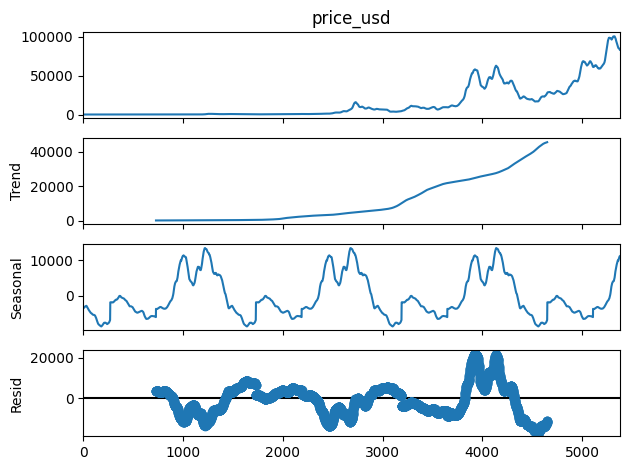

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(serie, model='additive', period=1460)

decompose.plot()
plt.tight_layout()
plt.show()

In [76]:
# btc_arima_avg = btc_arima[]

btc_arima_avg = btc_arima.groupby(['year', 'month']).mean().reset_index()
btc_arima_avg

,year,month,date,price_usd,network_hashrate,difficulty_h/s,day
0,2010,7,2010-07-24 12:00:00,0.072323,8.056463e-04,7.646855e+01,24.5
1,2010,8,2010-08-16 00:00:00,0.064284,2.690322e-03,2.820082e+02,16.0
2,2010,9,2010-09-15 12:00:00,0.063394,5.516912e-03,6.228462e+02,15.5
3,2010,10,2010-10-16 00:00:00,0.075977,1.074479e-02,1.202808e+03,16.0
4,2010,11,2010-11-15 12:00:00,0.195861,3.105021e-02,3.189428e+03,15.5
...,...,...,...,...,...,...,...
173,2024,12,2024-12-16 00:00:00,95817.817822,7.561134e+08,1.036725e+14,16.0
174,2025,1,2025-01-16 00:00:00,97949.432052,7.857852e+08,1.089697e+14,16.0
175,2025,2,2025-02-14 12:00:00,99519.385622,7.973248e+08,1.103331e+14,14.5
176,2025,3,2025-03-16 00:00:00,89347.667977,8.044427e+08,1.118902e+14,16.0


In [77]:
model_m = SARIMAX(
    btc_arima_avg['price_usd'],
    order=(1,1,1),
    seasonal_order=(1,1,1,48),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_m = model_m.fit(disp=False)

c:\Users\abarr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [78]:
model_d = SARIMAX(
    btc_arima['price_usd'],
    order=(1,1,1),
    seasonal_order=(1,1,1,30),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_d = model_d.fit(disp=False)

In [79]:
# model_2m = SARIMAX(
#     btc_arima['price_usd'],
#     order=(1,1,1),
#     seasonal_order=(1,1,1,60),
#     enforce_stationarity=False,
#     enforce_invertibility=False
# )

# results_2m = model_2m.fit(disp=False)

In [80]:
# model_3m = SARIMAX(
#     btc_arima['price_usd'],
#     order=(1,1,1),
#     seasonal_order=(1,1,1,90),
#     enforce_stationarity=False,
#     enforce_invertibility=False
# )

# results_3m = model_3m.fit(disp=False)

In [81]:
# model_year = SARIMAX(
#     btc_arima['price_usd'],
#     order=(1,1,1),
#     seasonal_order=(1,1,1,365),
#     enforce_stationarity=False,
#     enforce_invertibility=False
# )

# results_year = model_year.fit(disp=False)

In [82]:
results_m.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1600x800 with 0 Axes>

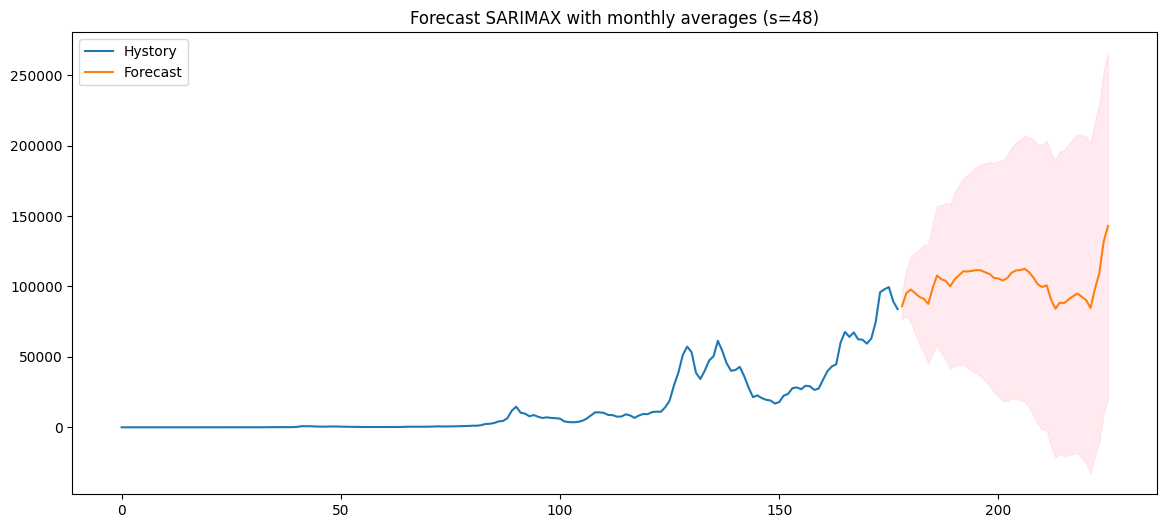

In [ ]:
forecast = results_m.get_forecast(steps=48)  
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(btc_arima_avg['price_usd'], label='Hystory')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Forecast SARIMAX with monthly averages (s=48)')
plt.show()